# Scientific analysis in Python

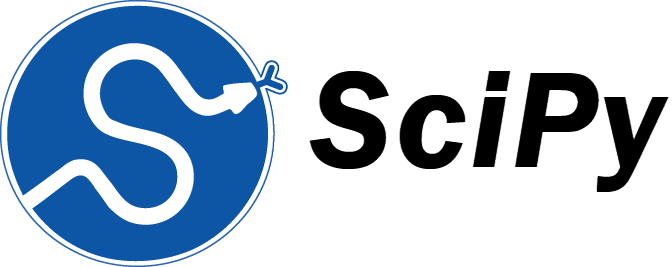

 - collection of packages and functions based on NumPy
 - the goal is to have similar functionality as is available in MATLAB, IDL, R...
 - heavily integrated with NumPy and matplotlib

## Organized in Sub-packages
### need to be individually imported

    cluster 	    Clustering algorithms
    constants       Physical and mathematical constants
    fftpack         Fast Fourier Transform routines
    integrate       Integration and ordinary differential equation solvers
    interpolate     Interpolation and smoothing splines
    io              Input and Output
    linalg          Linear algebra
    ndimage         N-dimensional image processing
    odr             Orthogonal distance regression
    optimize        Optimization and root-finding routines
    signal          Signal processing
    sparse          Sparse matrices and associated routines
    spatial         Spatial data structures and algorithms
    special         Special functions
    stats           Statistical distributions and functions

DO:

from scipy import ndimage

DON'T:

import scipy

from scipy import *

## Interpolation

### 1d Interpolation

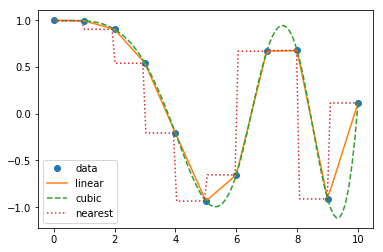

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='next')

xnew = np.linspace(0, 10, num=100, endpoint=True)
plt.plot(x, y, 'o')
plt.plot(xnew, f(xnew), '-') 
plt.plot(xnew, f2(xnew), '--')
plt.plot(xnew, f3(xnew), ':')
plt.legend(['data', 'linear', 'cubic','nearest'], loc='best')
plt.show()

### 2d Interpolation

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

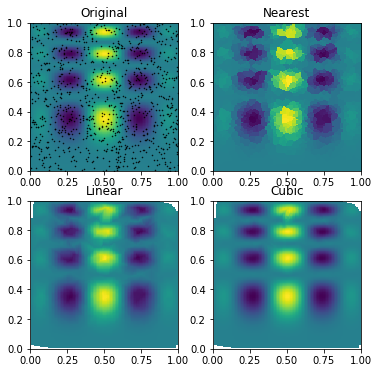

In [41]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

## Integration

### Numerical Integration

Suppose we want to integrate any function $f(x)$ within the boarders $a$ and $b$

$\int_{a}^{b} f(x) dx$

Say for a concrete example $\int_{0}^{\pi/2} sin(x) dx$ 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# quad integrates the function using adaptive Gaussian quadrature from the Fortran QUADPACK library

res, err = quad(np.sin, 0, np.pi/2)

print(res)
print(err)

0.9999999999999999
1.1102230246251564e-14


### Integrating ordinary differential equations (ODE)

Lets use the example: $\frac{dy}{dt} = -2y$

We want to integrate this equation between $t=0$ and $t=4$ with initial condition $y(t=0)=1$ 

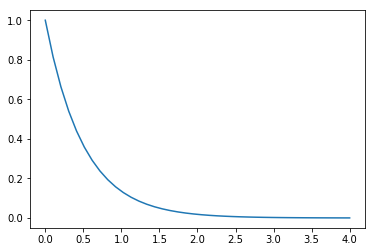

In [43]:
from scipy.integrate import odeint

def calc_derivative(ypos, time):
    return -2 * ypos

time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_vec)

plt.plot(time_vec,y)
plt.show()

## Optimization

### Curve fitting

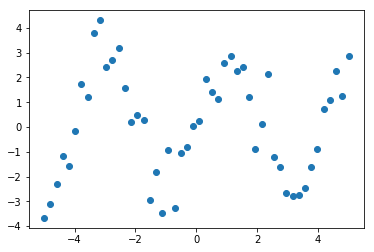

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# We know that the data lies on a sine wave, but not the amplitudes or the period.

plt.plot(x_data,y_data,"o")
plt.show()

[2.72741844 1.53705133]


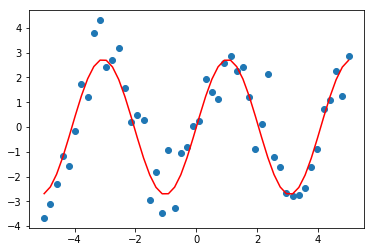

In [45]:
# Set up a function with free parameters to fit to the data

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

plt.plot(x_data,y_data,"o")
plt.plot(x_data,test_func(x_data,params[0],params[1]),"r-")
plt.show()

### Finding the minimum

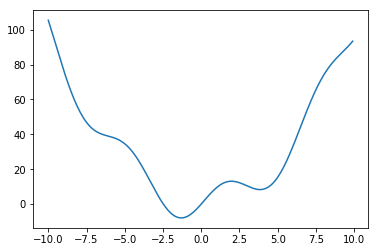

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


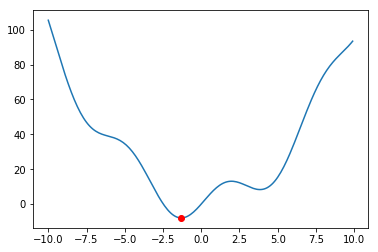

In [47]:
result = optimize.minimize(f, x0=0)

# Uses by default the Broyden–Fletcher–Goldfarb–Shanno algorithm but another algorithm can be defined.
# result is a compound object that contains all the information of the minimization attempt

print(result)
plt.plot(x, f(x))
plt.plot(result.x, f(result.x),"ro")
plt.show()

### Orbit fitting with SciPy
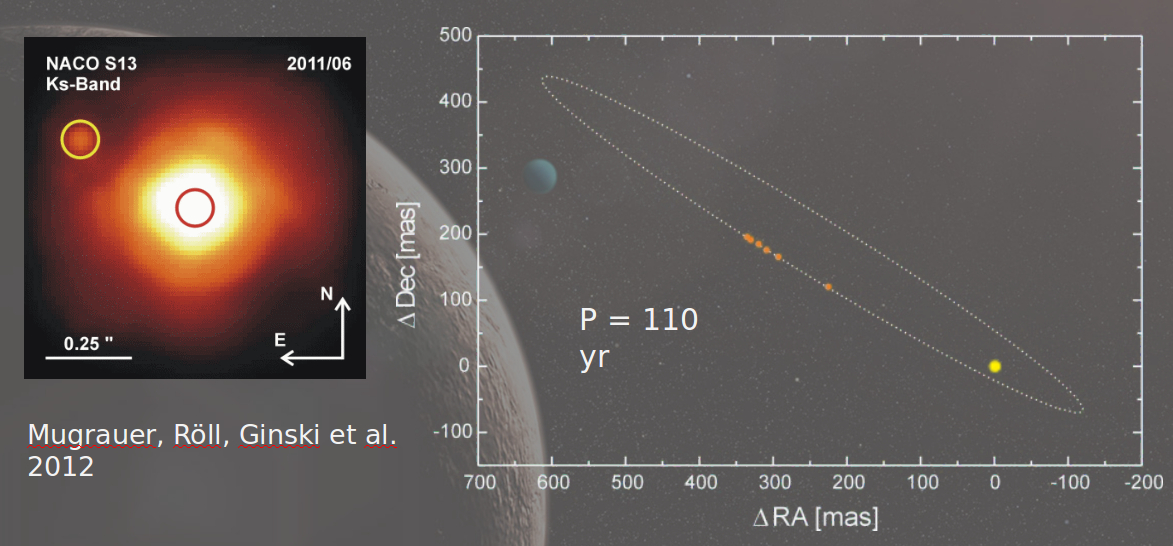

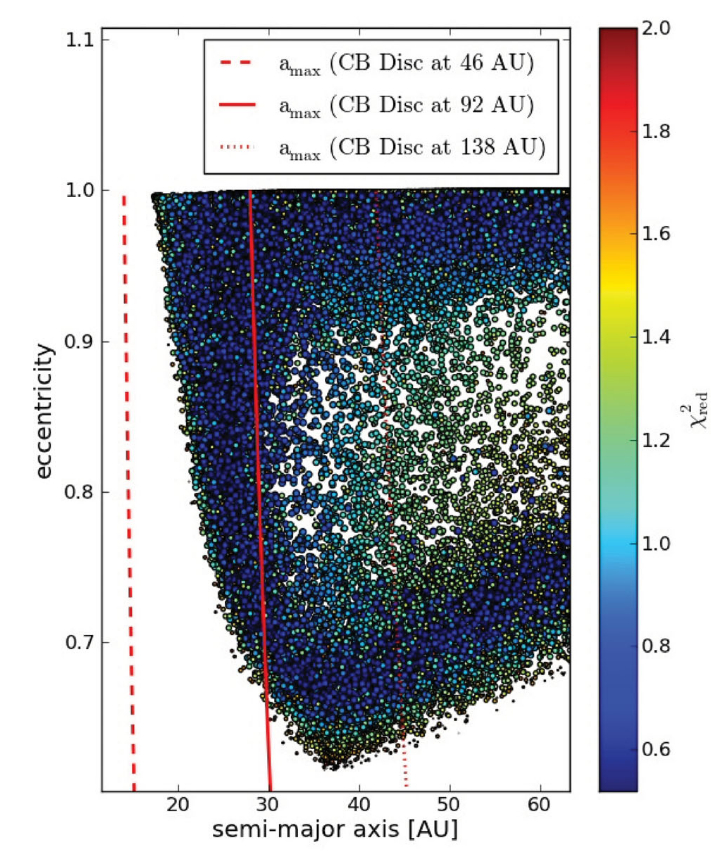

## Fourier Transforms

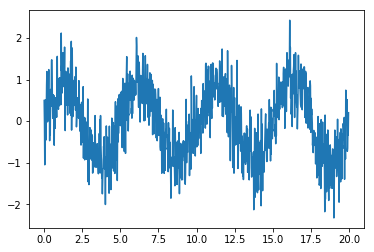

In [48]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))

plt.plot(time_vec, sig, label='Original signal')
plt.show()

Text(0, 0.5, 'power')

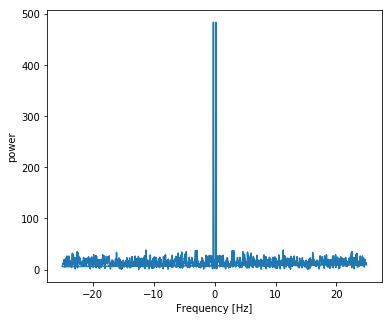

In [51]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

/home/christian/anaconda2/envs/python3-env/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


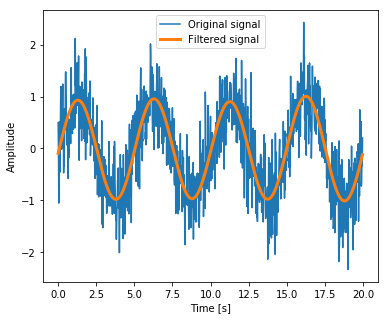

In [52]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
plt.show()

## Image processing

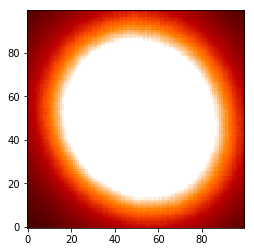

In [54]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from scipy import ndimage as nd
from scipy.ndimage.filters import gaussian_filter

fits_file = fits.open("./data/exohost.fits")
data_array = fits_file[0].data

plt.imshow(data_array, origin='lower', cmap=plt.cm.gist_heat , vmin=-10, vmax=200)
plt.show()


### High-pass filter

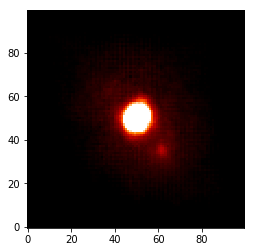

In [55]:
low_frequ = gaussian_filter(data_array, sigma=10, truncate=6.1)

high_pass_filtered_image = data_array - low_frequ

plt.imshow(high_pass_filtered_image, origin='lower', cmap=plt.cm.gist_heat , vmin=-10, vmax=200)
plt.show()

### Remove radial average

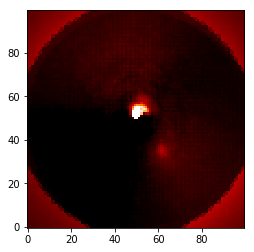

In [56]:
rot_angles = np.arange(0,180,5)
rotated_images = []

for angle in rot_angles:
    rotated = nd.rotate(data_array, angle, axes=(-1, -2), reshape=False, output=None, order=3, mode='constant', cval=0.0, prefilter=True)
    diff = data_array - rotated
    rotated_images.append(diff)

rotated_images = np.array(rotated_images)
final_subtracted_result = np.median(rotated_images, axis=0)

plt.imshow(final_subtracted_result, origin='lower', cmap=plt.cm.gist_heat , vmin=-10, vmax=200)
plt.show()